# Build Model

## Data Quality and Cleaning

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold
# Import Data
option_train = pd.read_csv("option_train.csv")

In [295]:
option_train.describe()

,Value,S,K,tau,r
count,1678.000000,1679.000000,1678.000000,1679.000000,1680.000000
mean,15.068709,464.402535,438.241955,0.437519,0.030235
std,14.040023,973.652179,23.408989,7.057555,0.000557
min,0.125000,0.000000,375.000000,0.003968,0.029510
25%,2.255001,433.863864,420.000000,0.119048,0.029820
50%,11.190967,442.634081,440.000000,0.202381,0.030130
75%,25.747434,447.320414,455.000000,0.285714,0.030540
max,60.149367,40333.000000,500.000000,250.000000,0.031880


In [296]:
for var in option_train.columns:
    print('Variable [{}]------'.format(var))
    print("Num of null: {}".format(pd.isna(option_train[var]).sum()))
    print("Num of Unique: {}".format(len(option_train[var].unique())))
    print("Most Common: {}".format(option_train[var].value_counts().head(1).index[0]))
    print("Num 0: {}\n".format(((option_train[var]==0).sum())))

Variable [Value]------
Num of null: 2
Num of Unique: 1624
Most Common: 0.190000001
Num 0: 0

Variable [S]------
Num of null: 1
Num of Unique: 202
Most Common: 444.3587258
Num 0: 1

Variable [K]------
Num of null: 2
Num of Unique: 26
Most Common: 440.0
Num 0: 0

Variable [tau]------
Num of null: 1
Num of Unique: 88
Most Common: 0.261904762
Num 0: 0

Variable [r]------
Num of null: 0
Num of Unique: 20
Most Common: 0.02962
Num 0: 0

Variable [BS]------
Num of null: 0
Num of Unique: 2
Most Common: Under
Num 0: 0



In [297]:
# Null rows
null_rows = option_train.isnull().any(axis=1)

# filter the dataframe to show only rows with null values
rows_with_null = option_train[null_rows].index

# print the index of the rows with null values
print(rows_with_null)

Int64Index([53, 292, 818], dtype='int64')


In [298]:
# I just dropped all NA record, but we should do imnputation
option_train.dropna(inplace=True)

In [299]:
option_train.iloc[[12, 33, 47, 879, 53, 292, 818]].to_csv('outlier.csv')

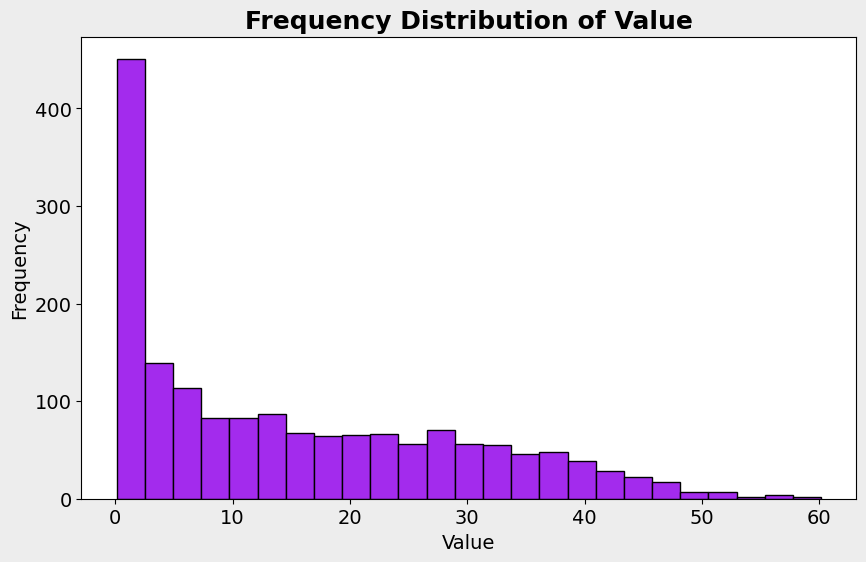

In [300]:
option_train["Value"].plot.hist(bins=25,edgecolor='black',figsize = (10,6),
                                                color = '#A32BED')
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('Value',fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Value', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

Text(0.5, 1.0, 'Frequency Distribution of Value')

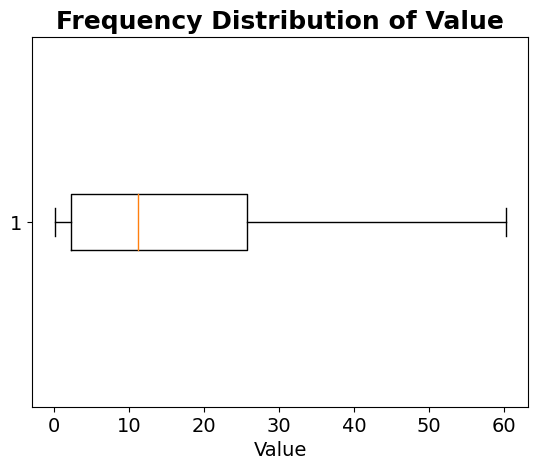

In [301]:
fig, ax = plt.subplots()
ax.boxplot(option_train["Value"],vert=False)
plt.xlabel('Value',fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of Value', fontweight="bold",fontsize=18)

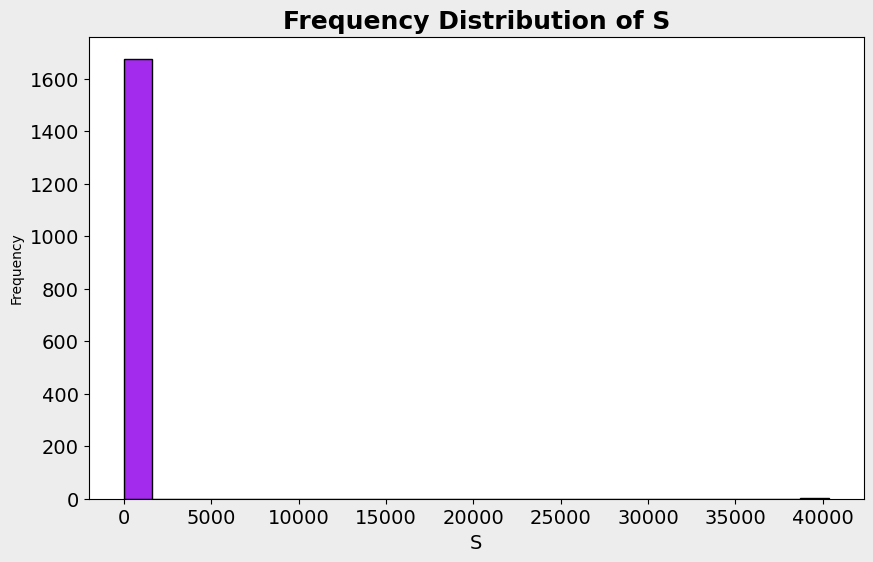

In [302]:
option_train["S"].plot.hist(bins=25,edgecolor='black',figsize = (10,6),
                                                color = '#A32BED')
#plt.ylabel('Log Frequency',fontsize=14)
plt.xlabel('S',fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of S', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

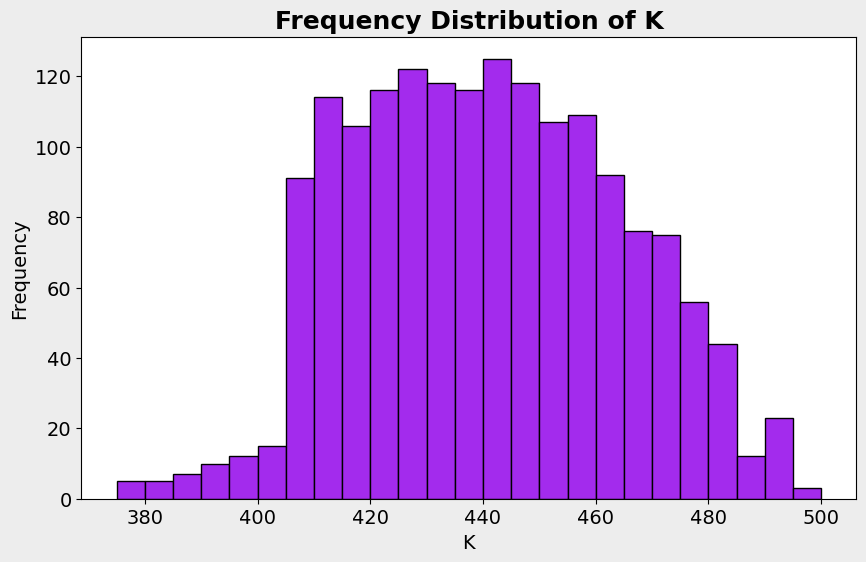

In [303]:
option_train["K"].plot.hist(bins=25,edgecolor='black',figsize = (10,6),
                                                color = '#A32BED')
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('K',fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of K', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

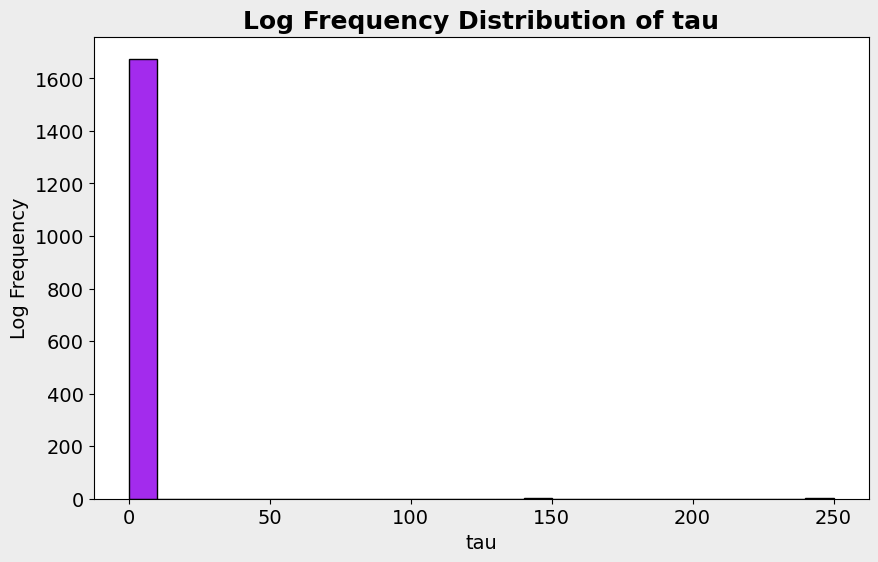

In [306]:
option_train["tau"].plot.hist(bins=25,edgecolor='black',figsize = (10,6),
                                                color = '#A32BED')
plt.ylabel('Log Frequency',fontsize=14)
plt.xlabel('tau',fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Log Frequency Distribution of tau', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

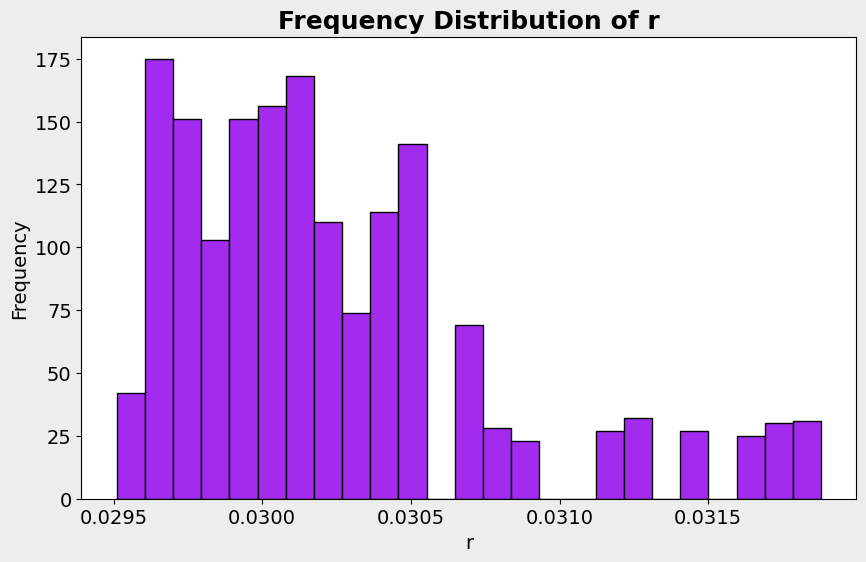

In [222]:
option_train["r"].plot.hist(bins=25,edgecolor='black',figsize = (10,6),
                                                color = '#A32BED')
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('r',fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Frequency Distribution of r', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

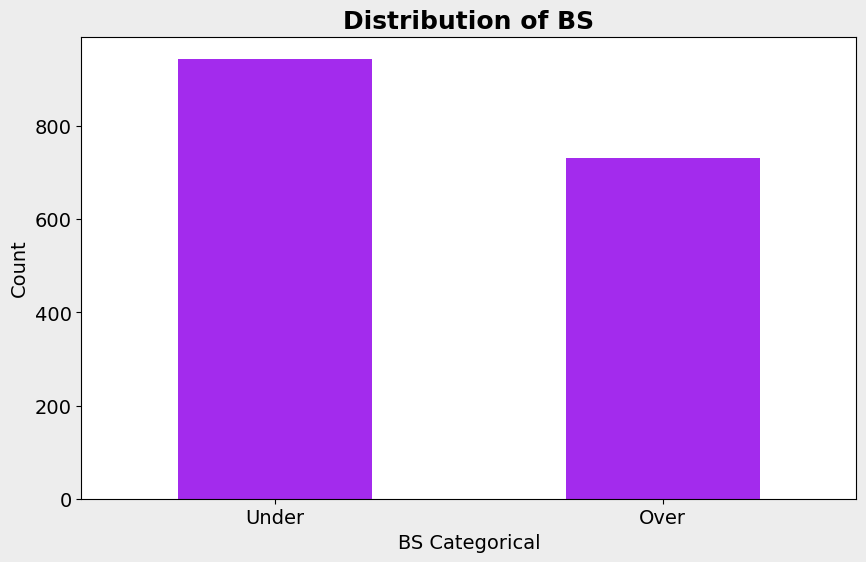

In [223]:
option_train["BS"].value_counts().head(20).plot(kind = 'bar',
                                                figsize = (10,6),
                                                color = '#A32BED')
plt.ylabel('Count',fontsize=14)
plt.xlabel('BS Categorical',fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plt.title('Distribution of BS', fontweight="bold",fontsize=18)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

## Clean Data


In [224]:
option_train = option_train.drop('BS', axis=1)
option_train.shape

(1677, 5)

In [225]:
def outliers(option_train):
    zscore = lambda x: abs((x - x.mean()) / x.std())
    std_data = option_train.apply(zscore)
    outlier_indices = option_train[(std_data['K'] >= 3) |
                                   (std_data['tau'] >= 3) |
                                   (std_data['r'] >= 3) |
                                   #(std_data['Value'] >= 3) |
                                   (std_data['S'] >= 3)].index
    if len(outlier_indices.values) > 0:
        print(outlier_indices)
        
    
    return outlier_indices

while len(outliers(option_train).values) > 0:
    option_train = option_train.drop(outliers(option_train))
len(outliers(option_train).values)

Int64Index([12, 33, 47], dtype='int64')
Int64Index([12, 33, 47], dtype='int64')
Int64Index([879], dtype='int64')
Int64Index([879], dtype='int64')


0

## Make More Features

In [226]:
option_train['future_mult'] = (1+(option_train.r))**(option_train.tau)
option_train['S/K'] = option_train.S / option_train.K 


## Try Models

### Regression Objective

In [227]:
X = option_train[['S','K','tau','r','future_mult','S/K']]
y = option_train['Value']

In [145]:
option_train.shape

(1673, 7)

In [17]:
kfolds = KFold(n_splits = 5, shuffle = True, random_state = 1)
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.98455735 0.98241568 0.98257262 0.98198831 0.98131237]
Mean cross-validation R-squared score: 0.9825692660307956


In [18]:
# Tune DT
DT_reg = DecisionTreeRegressor(max_depth = 10,min_samples_leaf = 20)
scores = cross_val_score(DT_reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.98726069 0.9872328  0.99008716 0.99025926 0.99161092]
Mean cross-validation R-squared score: 0.9892901631864582


In [19]:
# Tune RF
RF_Reg = RandomForestRegressor()
scores = cross_val_score(RF_Reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.99742346 0.9979456  0.99840899 0.99843496 0.99841797]
Mean cross-validation R-squared score: 0.9981261968529251


In [20]:
# Tune LGBM
LGBM_Reg = lgb.LGBMRegressor()
scores = cross_val_score(LGBM_Reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.99695062 0.99674154 0.99787168 0.99868612 0.9988402 ]
Mean cross-validation R-squared score: 0.9978180312296343


In [21]:
# Tune XGBoost
xgb_reg = xgb.XGBRegressor(n_estimators=1000,max_depth = 5)
scores = cross_val_score(xgb_reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.99832099 0.99865826 0.99913222 0.99887301 0.99901129]
Mean cross-validation R-squared score: 0.9987991549821551


In [22]:
# Tune Gadient Boosting
GBM_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4)
scores = cross_val_score(GBM_reg, X, y, cv=kfolds, scoring='r2')
print('Cross-validation R-squared scores:', scores)
print('Mean cross-validation R-squared score:', scores.mean())

Cross-validation R-squared scores: [0.99872821 0.99891529 0.99937988 0.99927583 0.99935625]
Mean cross-validation R-squared score: 0.9991310923063386


In [26]:
def run_reg(X, y, counter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    kfolds = KFold(n_splits = 5, shuffle = True)
    # LR
    reg = LinearRegression()
    scores = cross_val_score(reg, X, y, cv=kfolds, scoring='r2')
    reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Linear\nRegression'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = reg.score(X_train, y_train)
    reg_output['Testing'][counter] = reg.score(X_test, y_test)
    counter += 1
    # DT
    dt_reg = DecisionTreeRegressor(max_depth = 10,min_samples_leaf = 20)
    scores = cross_val_score(dt_reg, X, y, cv=kfolds, scoring='r2')
    dt_reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Decision\nTree'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = dt_reg.score(X_train, y_train)
    reg_output['Testing'][counter] = dt_reg.score(X_test, y_test)
    counter += 1
    # RF
    RF_Reg = RandomForestRegressor()
    scores = cross_val_score(RF_Reg, X, y, cv=kfolds, scoring='r2')
    RF_Reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Random\nForest'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = RF_Reg.score(X_train, y_train)
    reg_output['Testing'][counter] = RF_Reg.score(X_test, y_test)
    counter += 1
    
    # LGBM
    LGBM_Reg = lgb.LGBMRegressor()
    scores = cross_val_score(LGBM_Reg, X, y, cv=kfolds, scoring='r2')
    LGBM_Reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'LightGBM'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = LGBM_Reg.score(X_train, y_train)
    reg_output['Testing'][counter] = LGBM_Reg.score(X_test, y_test)
    counter += 1

    # XGB
    xgb_reg = xgb.XGBRegressor(n_estimators=100,max_depth = 5)
    scores = cross_val_score(xgb_reg, X, y, cv=kfolds, scoring='r2')
    xgb_reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'XGBoost'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = xgb_reg.score(X_train, y_train)
    reg_output['Testing'][counter] = xgb_reg.score(X_test, y_test)
    counter += 1

    # GBM
    GBM_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
    scores = cross_val_score(GBM_reg, X, y, cv=kfolds, scoring='r2')
    GBM_reg.fit(X_train, y_train)
    reg_output['Model'][counter] = 'Gradient\nBoosting'
    reg_output['CV'][counter] = scores.mean()
    reg_output['Training'][counter] = GBM_reg.score(X_train, y_train)
    reg_output['Testing'][counter] = GBM_reg.score(X_test, y_test)
    counter += 1
    return counter

In [27]:
# Run each best model 100 times

reg_output = pd.DataFrame(columns=['Model','Training','CV','Testing'],index=range(1000))
for i in range(100):
    if i == 0:
        counter = 0
    print(i)
    counter = run_reg(X, y, counter)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


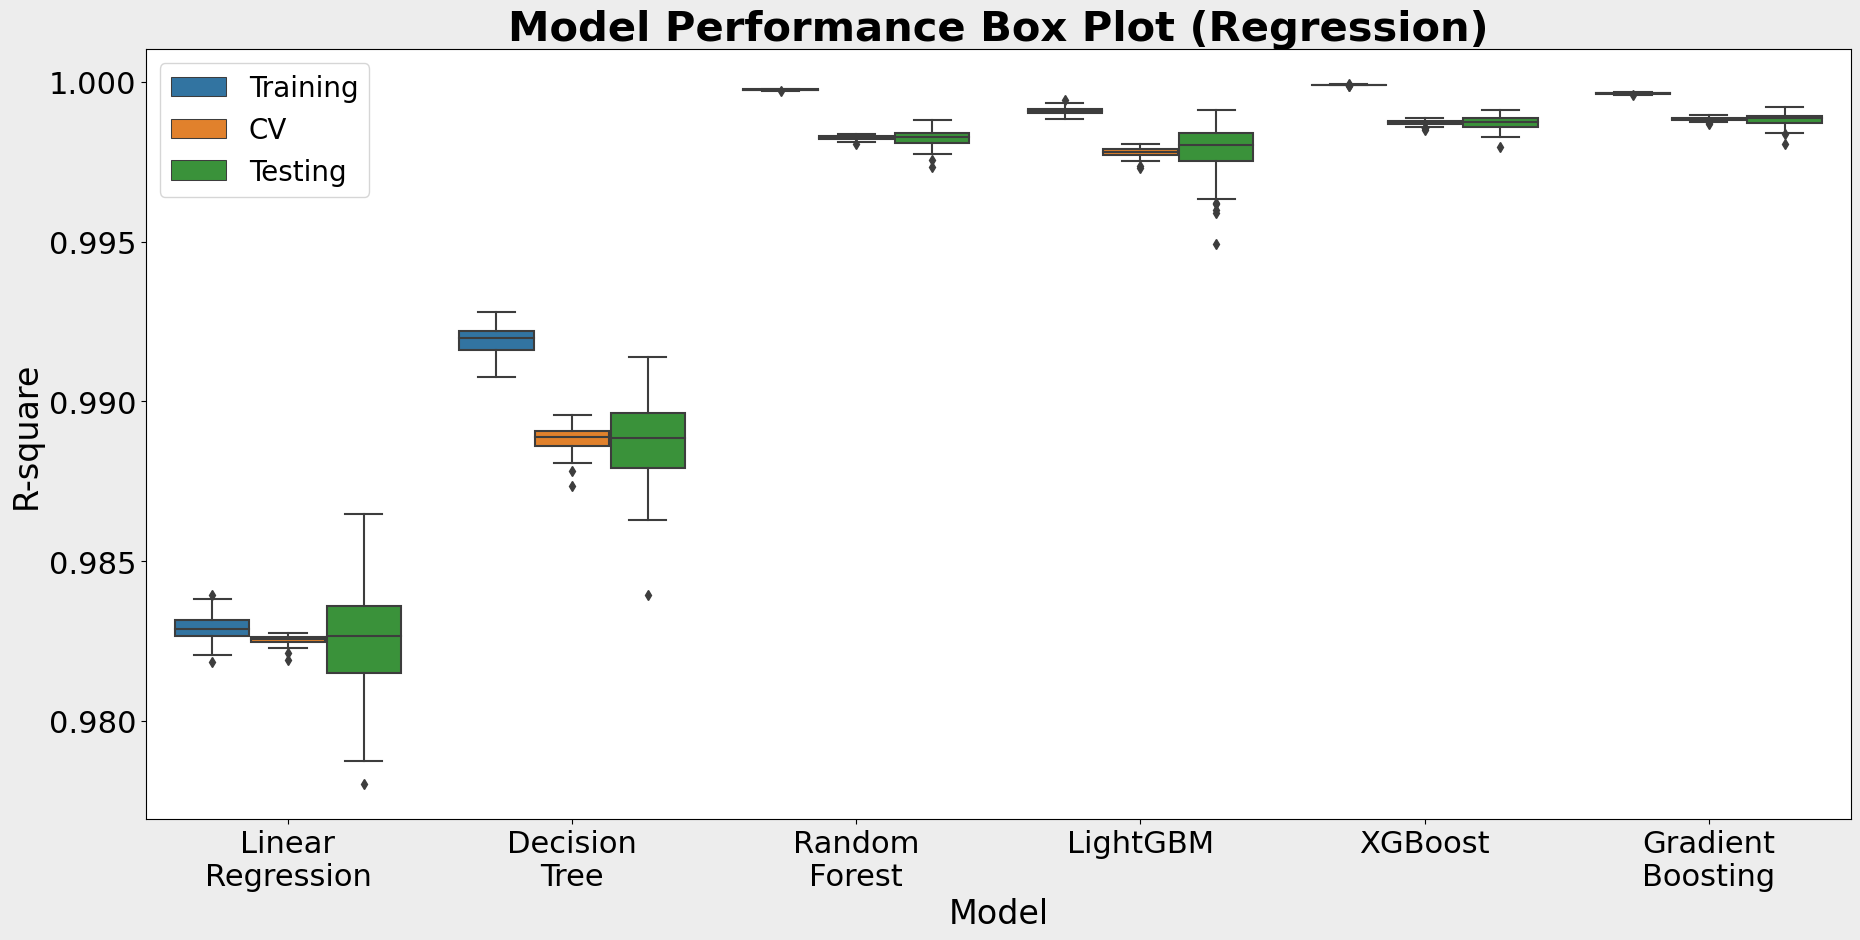

In [28]:
data_melt = pd.melt(reg_output, id_vars='Model', var_name='Type', value_name='Score')

# create the box plot
plt.figure(figsize=(22,10))
sns.boxplot(x='Model', y='Score', hue='Type', data=data_melt)
# ax = sns.boxplot(x='Model',y='Score',hue='Type', data=data_melt, palette=['b','g'])

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Model', fontsize=24)
plt.ylabel('R-square', fontsize=24)
plt.title('Model Performance Box Plot (Regression)', fontsize=30,fontweight='bold')
ax.set_ylim(0.97, 1)
# make the legend bigger
ax = plt.gca()
legend = ax.legend(fontsize=20)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

plt.show()

In [286]:
len(reg_output[(reg_output.Model == "Gradient\nBoosting")&(reg_output.Testing >=.9985)])/100

0.93

In [285]:
len(reg_output[(reg_output.Model == "Random\nForest")&(reg_output.Testing >=.9985)])/100

0.12

In [287]:
len(reg_output[(reg_output.Model == "XGBoost")&(reg_output.Testing >=.9985)])/100

0.84

In [259]:
reg_output

,Model,Training,CV,Testing
0,Linear\nRegression,0.983387,0.98265,0.980465
1,Decision\nTree,0.991914,0.989486,0.989681
2,Random\nForest,0.999737,0.998258,0.99847
3,LightGBM,0.999101,0.997871,0.99652
4,XGBoost,0.999899,0.998503,0.99901
...,...,...,...,...
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN


In [29]:
data_melt.groupby(["Model","Type"])["Score"].mean().to_frame()

Score
Model              Type              
Decision\nTree     CV        0.988848
                   Testing   0.988779
                   Training  0.991919
Gradient\nBoosting CV        0.998830
                   Testing   0.998816
                   Training  0.999637
LightGBM           CV        0.997798
                   Testing   0.997878
                   Training  0.999082
Linear\nRegression CV        0.982538
                   Testing   0.982565
                   Training  0.982899
Random\nForest     CV        0.998246
                   Testing   0.998231
                   Training  0.999753
XGBoost            CV        0.998723
                   Testing   0.998718
                   Training  0.999901

In [228]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())
mse = mean_squared_error(y, model.predict(X))

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.594e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        22:40:28   Log-Likelihood:                -3392.1
No. Observations:                1673   AIC:                             6798.
Df Residuals:                    1666   BIC:                             6836.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -839.9768    863.510     -0.973      

In [229]:
print(mse)

3.3780015980192974


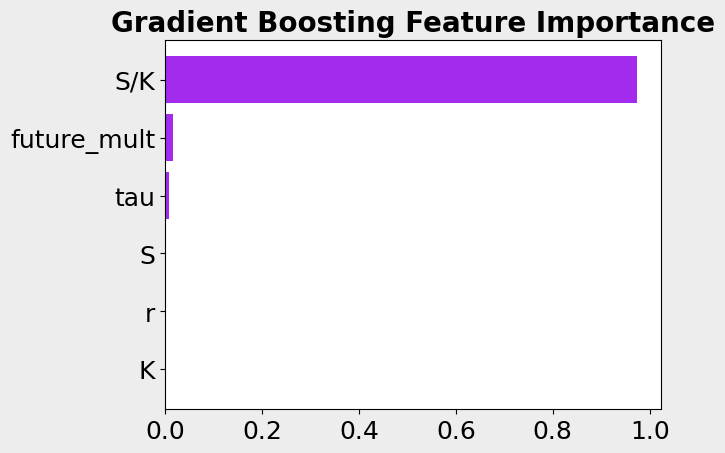

In [32]:
import matplotlib.pyplot as plt
X = option_train[['S','K','tau','r','future_mult','S/K']]

model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4)
model.fit(X, y)

# Plot the feature importance barplot
feature_importance = model.feature_importances_
feature_names = ['S','K','tau','r','future_mult','S/K']
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx],color = '#A32BED')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx],fontsize=18)
plt.xticks(fontsize=18)
plt.title('Gradient Boosting Feature Importance', fontsize=20,fontweight='bold')
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color
plt.show()

In [61]:
from sklearn.metrics import r2_score
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4)
model.fit(X, y)

y_train_pred = model.predict(X)

# calculate the difference between the predicted and actual y values
residuals = y_train_pred - y

# calculate the mean squared error (MSE)
mse = (residuals ** 2).mean()

# print the MSE as the training error
print("Training error:", mse)

r2_train = r2_score(y, y_train_pred)

print("Training R-squared:", r2_train)

Training error: 0.003200058795212614
Training R-squared: 0.9999837805713719


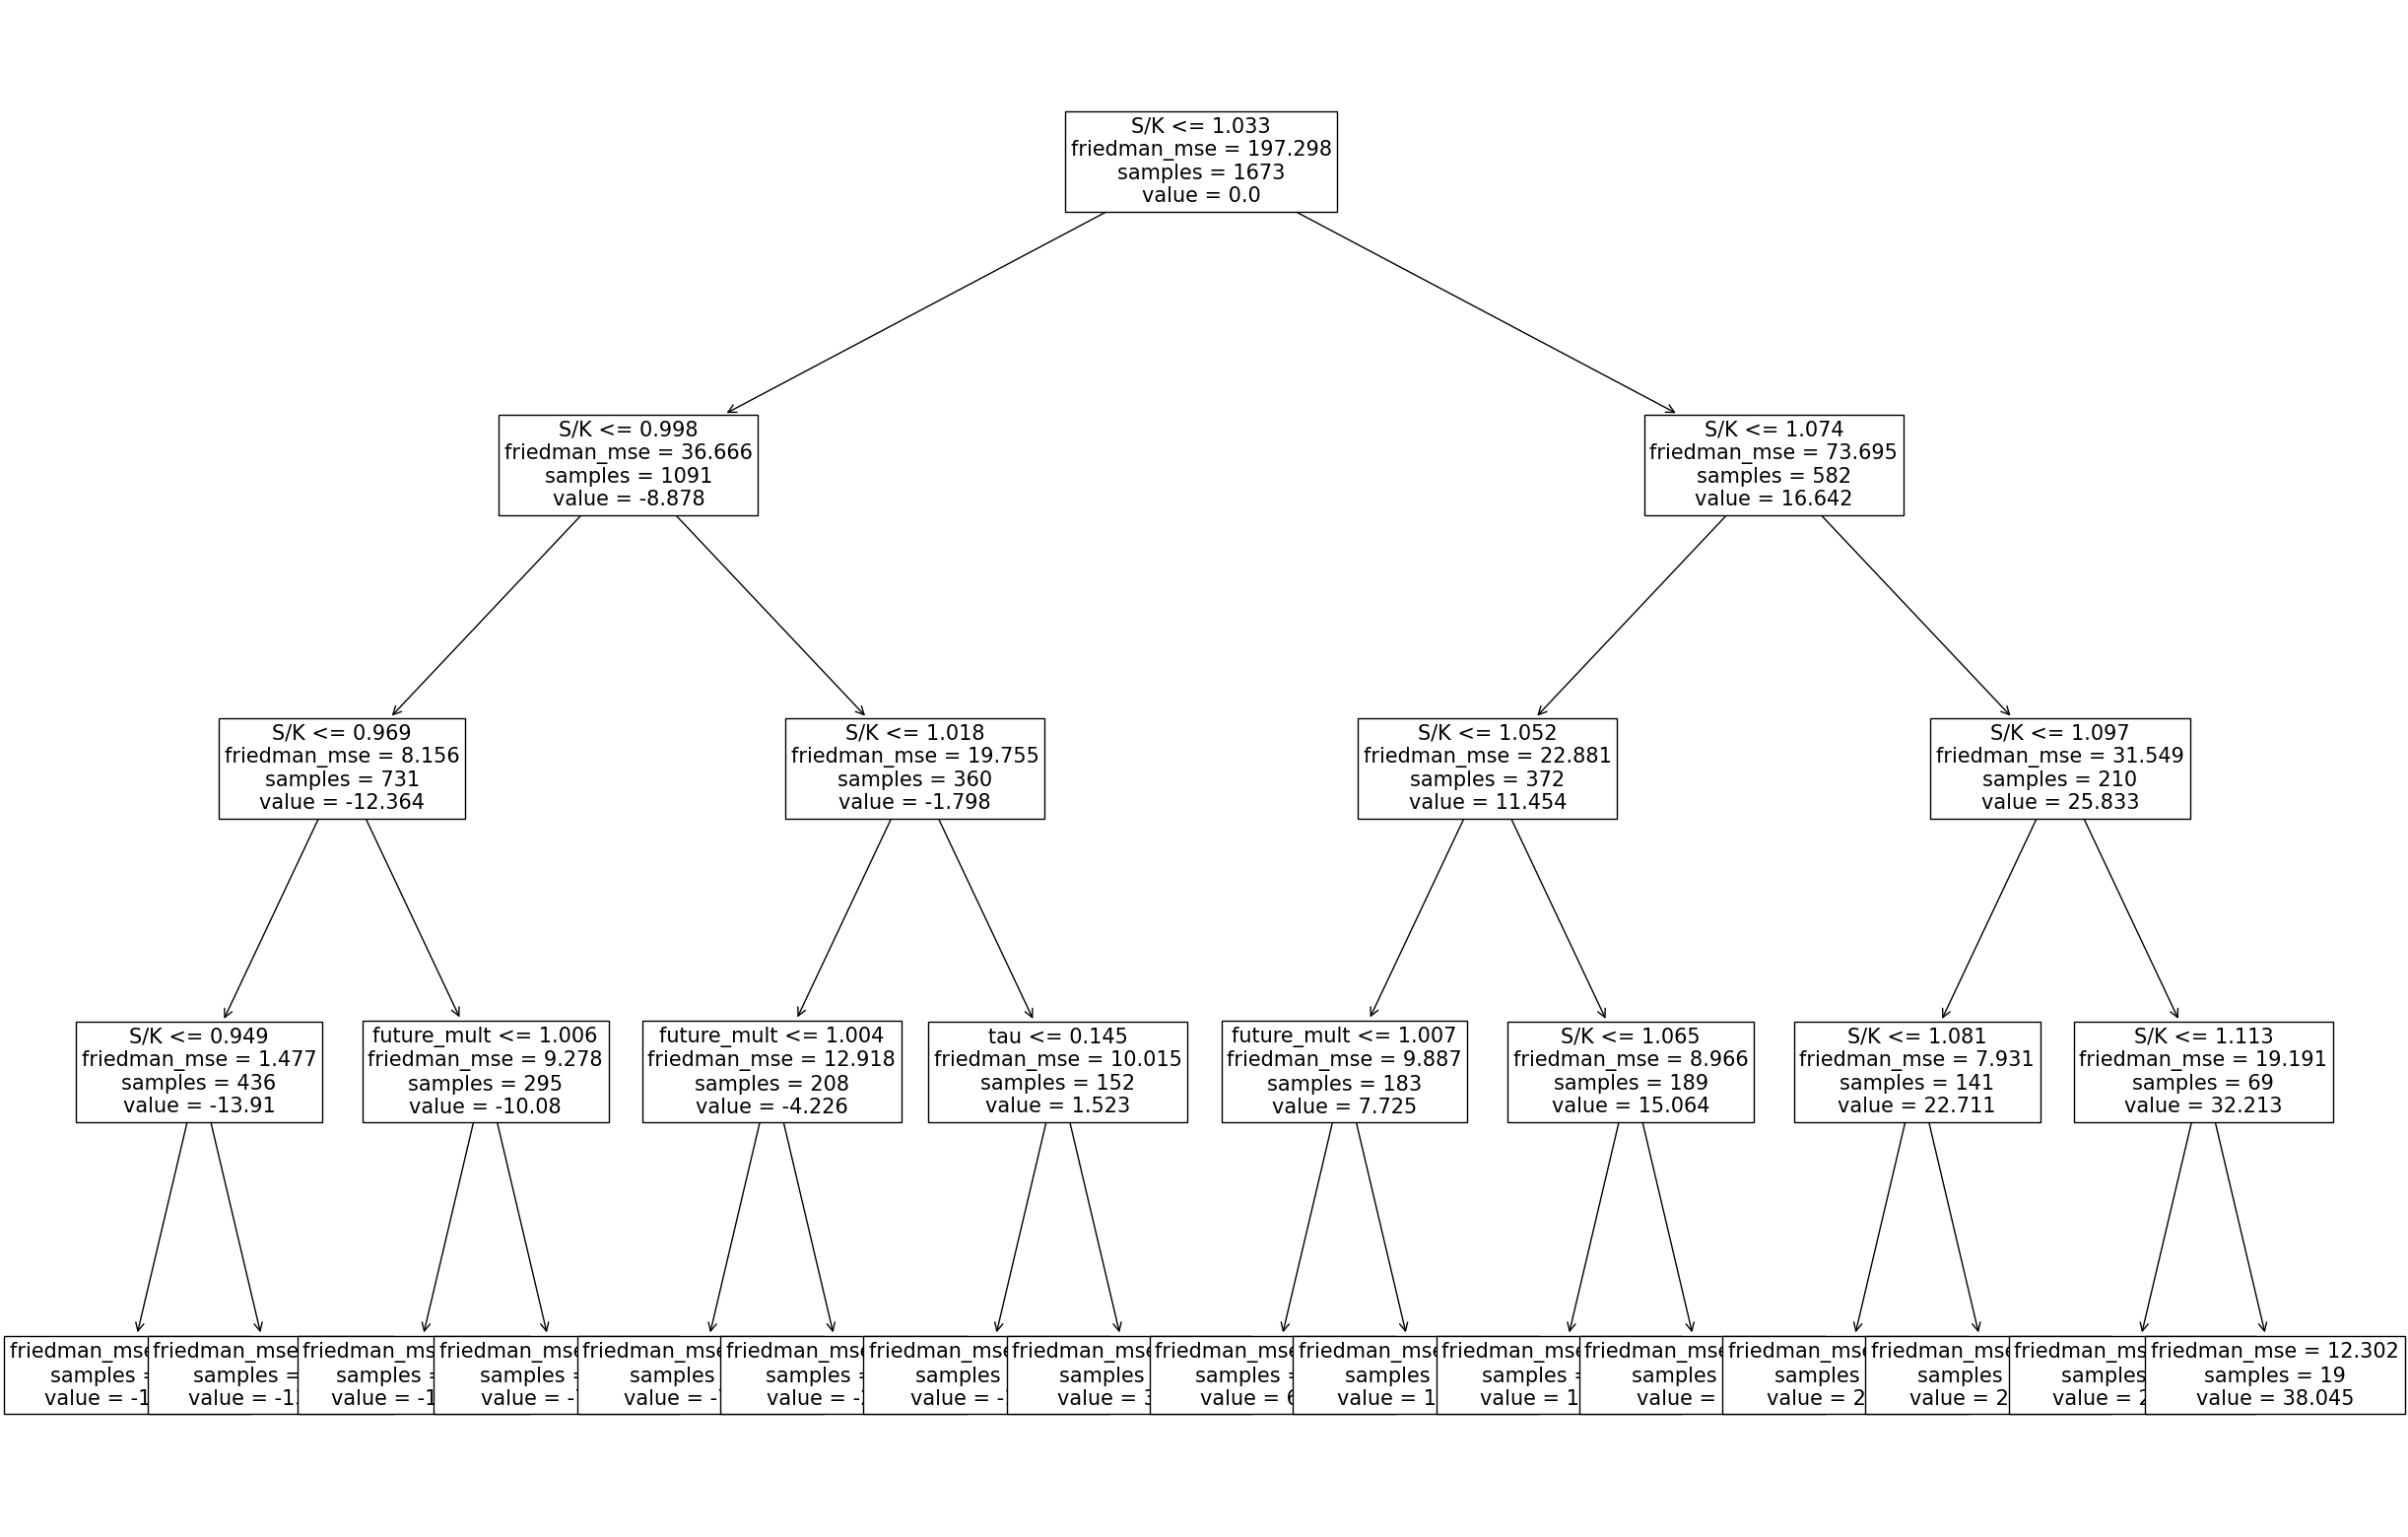

In [33]:
from sklearn.tree import plot_tree

model.fit(X, y)
plt.figure(figsize=(30,20))
plot_tree(model.estimators_[0][0],fontsize=15, feature_names = feature_names)
plt.gca().invert_yaxis()
plt.show()

### Classification Objective

In [102]:
option_train = pd.read_csv("option_train.csv")
option_train["cat"] = np.where(option_train.BS == "Over",1,0)
option_train = option_train.drop('BS', axis=1)
print(option_train.shape)
option_train.dropna(inplace=True)
option_train['future_mult'] = (1+(option_train.r))**(option_train.tau)
option_train['S/K'] = option_train.S / option_train.K 

(1680, 6)


In [103]:
def outliers(option_train):
    zscore = lambda x: abs((x - x.mean()) / x.std())
    std_data = option_train.apply(zscore)
    outlier_indices = option_train[(std_data['K'] >= 3) |
                                   (std_data['tau'] >= 3) |
                                   (std_data['r'] >= 3) |
                                   (std_data['S'] >= 3)].index
    if len(outlier_indices.values) > 0:
        print(outlier_indices)
        
    
    return outlier_indices

while len(outliers(option_train).values) > 0:
    option_train = option_train.drop(outliers(option_train))
len(outliers(option_train).values)


Int64Index([12, 33, 47], dtype='int64')
Int64Index([12, 33, 47], dtype='int64')
Int64Index([879], dtype='int64')
Int64Index([879], dtype='int64')


0

In [104]:
# Set y label
y_cat = option_train['cat']
X = option_train[['S','K','tau','r','future_mult','S/K']]

In [105]:
option_train.shape

(1673, 8)

In [106]:
# Tune DT
kfolds = StratifiedKFold(n_splits = 5, shuffle = True,random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2)

DTClassifier = DecisionTreeClassifier(max_depth = 5, 
                                min_samples_split = 20,
                                min_samples_leaf = 10)
scores = cross_val_score(DTClassifier, X_train, y_train, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.93283582 0.93283582 0.92164179 0.92883895 0.8988764 ]
CV Accuracy: 0.9230057577282128


In [107]:
# Tune LGBMClassifier
from lightgbm import LGBMClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2,random_state = 1)
kfolds = StratifiedKFold(n_splits = 5, shuffle = True,random_state = 1)
LGBMClassifier = LGBMClassifier(n_estimators = 10, 
                                max_depth = 5, 
                                num_leaves = 20,
                                learning_rate = 0.1)
scores = cross_val_score(LGBMClassifier, X_train, y_train, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.9141791  0.92537313 0.92537313 0.917603   0.94007491]
CV Accuracy: 0.9245206551512103


In [108]:
# Tune RandomForestClassifier
kfolds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
rf_cla = RandomForestClassifier(n_estimators = 75, 
                                max_depth = 5, 
                                max_features = 5,
                                min_samples_split = 25,
                                min_samples_leaf = 10)
scores = cross_val_score(rf_cla, X, y_cat, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.91343284 0.91641791 0.92835821 0.9251497  0.9251497 ]
CV Accuracy: 0.9217016712842971


In [109]:
# Tune XGBClassifier
kfolds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
xgb_cla = XGBClassifier(n_estimators = 50,
                        max_depth = 5,
                        learning_rate = 0.01,
                        subsample = 0.25,
                        gamma = 0.3)
scores = cross_val_score(xgb_cla, X, y_cat, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

[0.91641791 0.90746269 0.92537313 0.92814371 0.91916168]
CV Accuracy: 0.9193118241129682


In [110]:
# Tune CatBoost 
import catboost as cb
kfolds = StratifiedKFold(n_splits = 5, shuffle = True,random_state = 1)
catboost_cla = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')
scores = cross_val_score(catboost_cla, X, y_cat, cv=kfolds)
print(scores)
print("CV Accuracy: {}".format(scores.mean()))

/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


[0.91044776 0.91343284 0.93134328 0.93413174 0.94011976]
CV Accuracy: 0.9258950755206005


In [40]:
def run_cla(X, y, counter):
    X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2)
    kfolds = StratifiedKFold(n_splits = 5, shuffle = True)
    
    # Logistic Regression 
    LR = LogisticRegression()
    scores = cross_val_score(LR, X, y_cat, cv=kfolds)
    LR.fit(X_train, y_train)
    cla_output['Model'][counter] = 'Logistic\nRegression'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = LR.score(X_train, y_train)
    cla_output['Testing'][counter] = LR.score(X_test, y_test)
    counter += 1
    
    # Decision Tree Classifier
    DTClassifier = DecisionTreeClassifier(max_depth = 5, 
                                min_samples_split = 20,
                                min_samples_leaf = 10)
    scores = cross_val_score(DTClassifier,X, y_cat, cv=kfolds)
    DTClassifier.fit(X_train, y_train)
    cla_output['Model'][counter] = 'Decision\nTree'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = DTClassifier.score(X_train, y_train)
    cla_output['Testing'][counter] = DTClassifier.score(X_test, y_test)
    counter += 1
    
    # RandomForestClassifier
    rf_cla = RandomForestClassifier(n_estimators = 75, 
                                max_depth = 5, 
                                max_features = 5,
                                min_samples_split = 25,
                                min_samples_leaf = 10)
    scores = cross_val_score(rf_cla, X, y_cat, cv=kfolds)
    rf_cla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'Random\nForest'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = rf_cla.score(X_train, y_train)
    cla_output['Testing'][counter] = rf_cla.score(X_test, y_test)
    counter += 1
    
    # LGBMClassifier
    LGBMCla = LGBMClassifier(n_estimators = 12, 
                                max_depth = 5, 
                                num_leaves = 20,
                                learning_rate = 0.1)
    scores = cross_val_score(LGBMCla, X, y_cat, cv=kfolds)
    LGBMCla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'LightGBM'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = LGBMCla.score(X_train, y_train)
    cla_output['Testing'][counter] = LGBMCla.score(X_test, y_test)
    counter += 1
    
    # XGBClassifier
    xgb_cla = XGBClassifier(n_estimators = 50,
                        max_depth = 5,
                        learning_rate = 0.01,
                        subsample = 0.25,
                        gamma = 0.3)
    scores = cross_val_score(xgb_cla, X, y_cat, cv=kfolds)
    xgb_cla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'XGBoost'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = xgb_cla.score(X_train, y_train)
    cla_output['Testing'][counter] = xgb_cla.score(X_test, y_test)
    counter += 1
    
    #CatBoost
    catboost_cla = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')
    scores = cross_val_score(catboost_cla, X, y_cat, cv=kfolds)
    catboost_cla.fit(X_train, y_train)
    cla_output['Model'][counter] = 'CatBoost'
    cla_output['CV'][counter] = scores.mean()
    cla_output['Training'][counter] = catboost_cla.score(X_train, y_train)
    cla_output['Testing'][counter] = catboost_cla.score(X_test, y_test)
    counter += 1
    return counter

In [53]:
cla_output = pd.DataFrame(columns=['Model','Training','CV','Testing'],index=range(1000))
for i in range(100):
    if i == 0:
        counter = 0
    print(i)
    counter = run_cla(X, y_cat, counter)

0


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


2


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


3


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


4


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


5


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


6


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


7


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


8


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


9


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


10


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


11


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


12


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


13


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


14


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


16


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


17


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


18


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


19


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


20


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


21


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


22


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


23


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


24


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


25


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


26


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


27


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


28


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


29


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


30


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


31


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


33


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


34


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


35


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


36


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


37


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


38


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


39


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


40


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


41


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


42


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


43


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


44


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


45


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


46


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


47


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


48


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


49


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


50


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


51


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


52


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


53


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


54


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


55


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


56


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


57


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


58


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


59


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


60


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


61


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


62


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


63


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


64


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


65


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


66


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


67


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


68


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


69


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


70


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


71


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


72


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


73


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


74


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


75


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


76


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


77


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


78


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


79


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


80


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


81


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


82


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


83


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


84


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


85


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


86


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


87


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


88


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


89


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


90


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


91


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


92


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


93


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


94


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


95


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


96


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


97


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


98


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


99


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


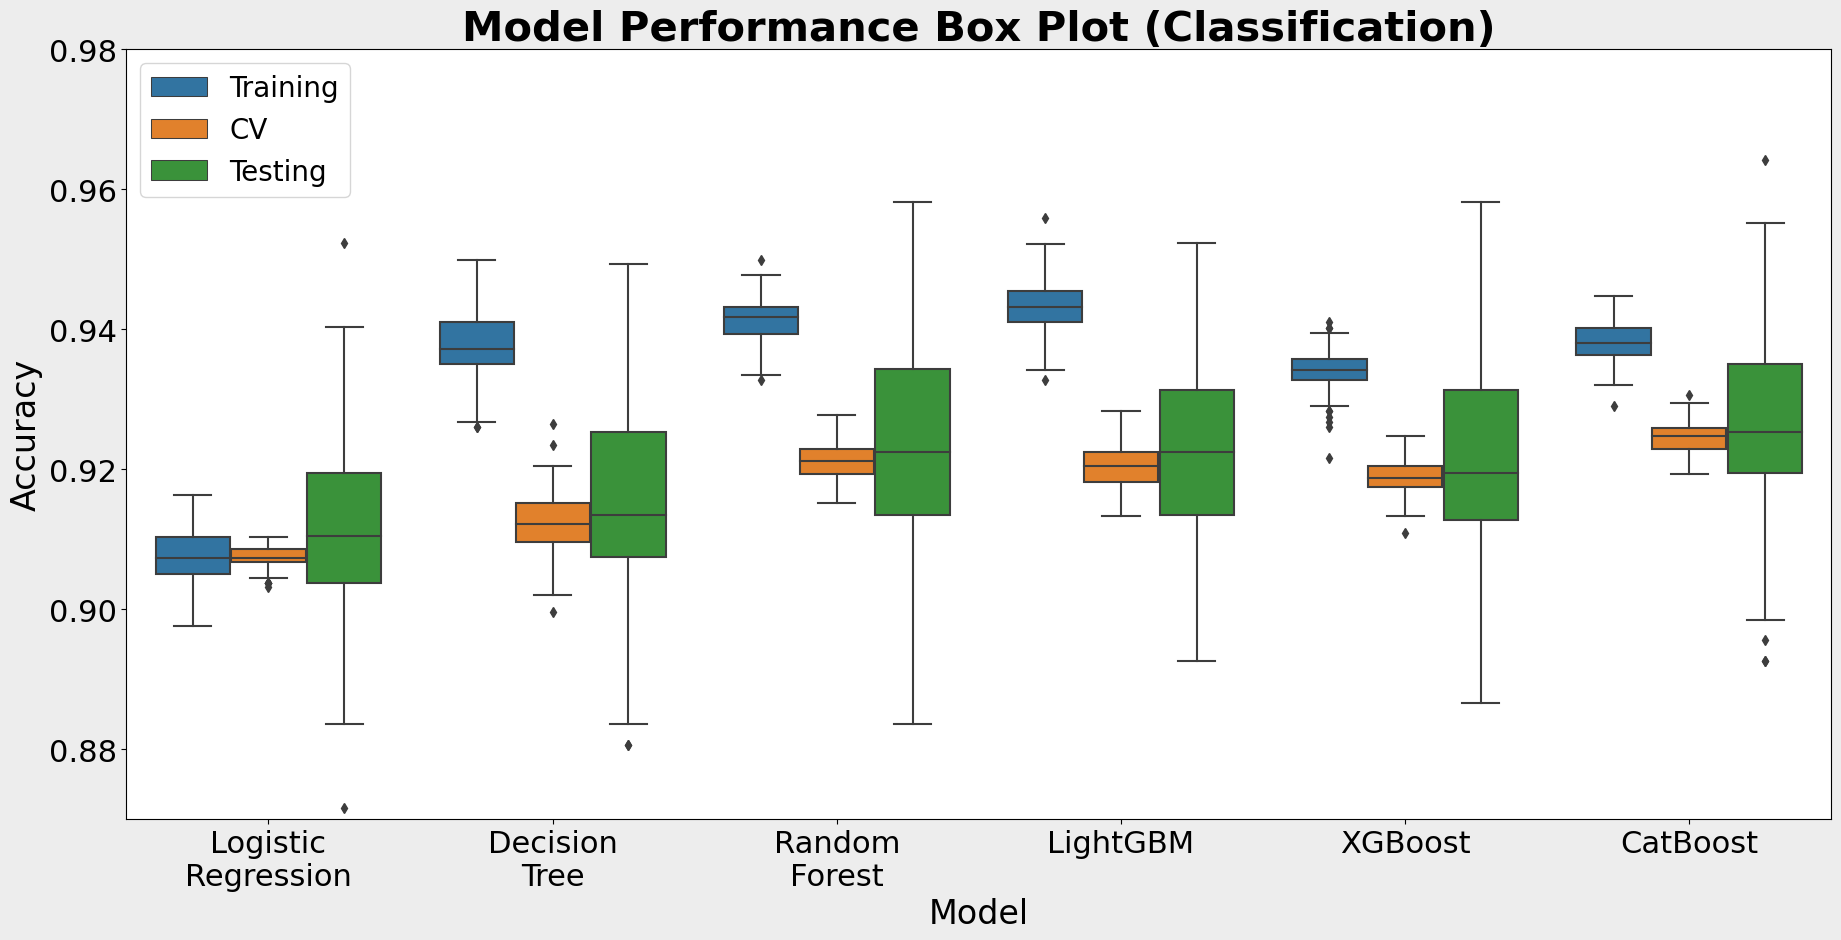

In [55]:
data_melt = pd.melt(cla_output, id_vars='Model', var_name='Type', value_name='Score')

# create the box plot
plt.figure(figsize=(22,10))
sns.boxplot(x='Model', y='Score', hue='Type', data=data_melt)
# ax = sns.boxplot(x='Model',y='Score',hue='Type', data=data_melt, palette=['b','g'])

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Model', fontsize=24)
plt.ylabel('Accuracy', fontsize=24)
plt.title('Model Performance Box Plot (Classification)', fontsize=30,fontweight='bold')
# make the legend bigger
ax = plt.gca()
legend = ax.legend(fontsize=20)
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color
plt.ylim([0.87, 0.98])


plt.show()

In [281]:
len(cla_output[(cla_output.Model == "CatBoost")&(cla_output.Testing >=.92)])/100

0.72

In [282]:
len(cla_output[(cla_output.Model == "CatBoost")&(cla_output.Testing >=.9)])/100

0.96

In [56]:
data_melt.groupby(["Model","Type"])["Score"].mean().to_frame()

Score
Model                Type              
CatBoost             CV        0.924718
                     Testing   0.927075
                     Training  0.938102
Decision\nTree       CV        0.912117
                     Testing   0.915493
                     Training  0.937369
LightGBM             CV        0.920418
                     Testing   0.922030
                     Training  0.943572
Logistic\nRegression CV        0.907476
                     Testing   0.909940
                     Training  0.907519
Random\nForest       CV        0.921214
                     Testing   0.923075
                     Training  0.941121
XGBoost              CV        0.918799
                     Testing   0.921343
                     Training  0.933819

/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


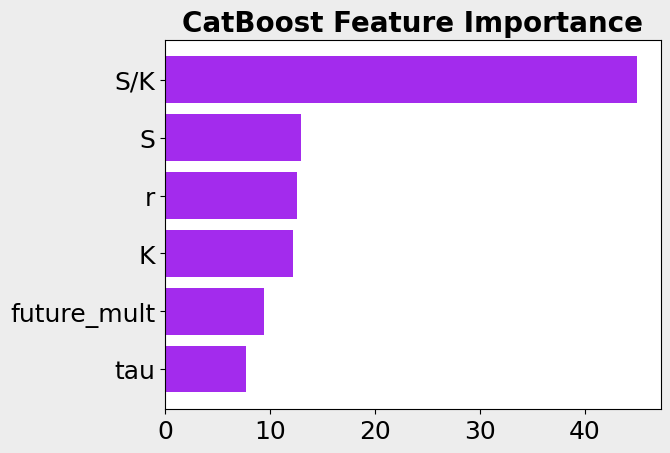

In [147]:
model = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')
model.fit(X, y_cat)

# Plot the feature importance barplot
feature_importance = model.feature_importances_
feature_names = ['S','K','tau','r','future_mult','S/K']
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx],color = '#A32BED')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx],fontsize=18)
plt.xticks(fontsize=18)
plt.title('CatBoost Feature Importance', fontsize=20,fontweight='bold')
fig = plt.gcf()  # Get current figure
fig.set_facecolor('#EDEDED')  # Set background color

plt.show()

In [111]:
import statsmodels.api as sm
# fit logistic regression model
X = sm.add_constant(X)
logit_model = sm.Logit(y_cat, X)
result = logit_model.fit()

# print model summary
print(result.summary())

         Current function value: 4.945567
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    cat   No. Observations:                 1673
Model:                          Logit   Df Residuals:                     1666
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  -6.221
Time:                        22:02:08   Log-Likelihood:                -8273.9
converged:                      False   LL-Null:                       -1145.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.682e+05   2.43e+05      3.572      0.000    3.92e+05    1.34e+06
S              40.2815     11.449      3.518      0.000      1

/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [257]:
import keras
def create_model_logi():
# Input layer: 3 input nodes
# single hidden layer having 4 nodes
# Output layer: 1 node
# Activation function: Sigmoid for function for both hidden layers and
# Cost function: binary cross-entropy loss
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(5, input_shape=(6,), activation="linear"))
    model.add(keras.layers.Dense(10, activation='linear'))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss="binary_crossentropy", metrics=["accuracy"])
    return model
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, stratify=y_cat, test_size=0.2)
kfolds = StratifiedKFold(n_splits = 5, shuffle = True)
model_logi = create_model_logi()
model_logi.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.1, verbose=0)

score = model_logi.evaluate(X, y_cat)
print(score)
print("Train: {}".format(model_logi.evaluate(X_train, y_train)[1]))
print("Test: {}".format(model_logi.evaluate(X_test, y_test)[1]))

53/53 [==============================] - 0s 335us/step - loss: 0.2414 - accuracy: 0.8989
[0.24140238761901855, 0.8988629579544067]
42/42 [==============================] - 0s 343us/step - loss: 0.2446 - accuracy: 0.8982
Train: 0.8982036113739014
11/11 [==============================] - 0s 383us/step - loss: 0.2287 - accuracy: 0.9015
Test: 0.9014925360679626


# Predict

In [307]:
option_train = pd.read_csv("option_train.csv")
option_train.dropna(inplace=True)
option_train["cat"] = np.where(option_train.BS == "Over",1,0)
option_train = option_train.drop('BS', axis=1)
print(option_train.shape)
option_train['future_mult'] = (1+(option_train.r))**(option_train.tau)
option_train['S/K'] = option_train.S / option_train.K 

(1677, 6)


In [308]:
def outliers(option_train):
    zscore = lambda x: abs((x - x.mean()) / x.std())
    std_data = option_train.apply(zscore)
    outlier_indices = option_train[(std_data['K'] >= 3) |
                                   (std_data['tau'] >= 3) |
                                   (std_data['r'] >= 3) |
                                   (std_data['S'] >= 3)].index
    if len(outlier_indices.values) > 0:
        print(outlier_indices)
        
    
    return outlier_indices

while len(outliers(option_train).values) > 0:
    option_train = option_train.drop(outliers(option_train))
len(outliers(option_train).values)

# Set y label
y_cat = option_train['cat']
X = option_train[['S','K','tau','r','future_mult','S/K']]
y = option_train['Value']

Int64Index([12, 33, 47], dtype='int64')
Int64Index([12, 33, 47], dtype='int64')
Int64Index([879], dtype='int64')
Int64Index([879], dtype='int64')


In [309]:
X_option_test = pd.read_csv("option_test_wolabel.csv")

In [310]:
# Make new features for test set
X_option_test['future_mult'] = (1+(X_option_test.r))**(X_option_test.tau)
X_option_test['S/K'] = X_option_test.S / X_option_test.K 

In [311]:
reg_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)

cla_model = cb.CatBoostClassifier(iterations=75,
                                     depth = 10,
                                     learning_rate = 0.1,
                                     verbose = 0,
                                     l2_leaf_reg = 25,
                                     loss_function='Logloss')

In [312]:
reg_model = reg_model.fit(X, y)
cla_model = cla_model.fit(X, y_cat)

/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [314]:
from sklearn.metrics import r2_score

y_train_pred = reg_model.predict(X)

# calculate the difference between the predicted and actual y values
residuals = y_train_pred - y

# calculate the mean squared error (MSE)
mse = (residuals ** 2).mean()

# print the MSE as the training error
print("Training error:", mse)

r2_train = r2_score(y, y_train_pred)

print("Regression Training R-squared:", r2_train)

y_train_pred_cat = cla_model.predict(X)
print("Classification Training Acuracy:", (y_train_pred_cat==y_cat).mean())

Training error: 0.07436416381041643
Regression Training R-squared: 0.9996230868479005
Classification Training Acuracy: 0.9390316796174537


/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [315]:
# Make prediction
pred_val = reg_model.predict(X_option_test)
pred_BS = cla_model.predict(X_option_test)

/Users/tomvdo29/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [316]:
df = pd.DataFrame({'Value': pred_val, 'BS': pred_BS})
print(df)

          Value  BS
0      1.159198   1
1     18.402101   0
2     10.611594   0
3     24.079087   0
4     16.494393   0
...         ...  ..
1115  11.596991   0
1116   0.326605   1
1117   0.621075   1
1118  23.489521   0
1119  15.336900   0

[1120 rows x 2 columns]


In [317]:
df[df.Value<=0]

,Value,BS
46,-0.003068,1
217,-0.007710,1
268,-0.010767,1
321,-0.083853,1


In [318]:
(df.BS==1).mean()

0.49375

In [319]:
(y_cat==1).mean()

0.43574417214584577

In [320]:
df.to_csv("group_21_prediction.csv", index=False)